In [26]:
import sqlite3

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
try:
    connection = sqlite3.connect("../data/checking-logs.sqlite")

    query_working_days = """
    SELECT
        strftime('%H', timestamp) AS hour,
        COUNT(*) * 1.0 / COUNT (DISTINCT DATE(timestamp)) AS count
    FROM checker
    WHERE uid LIKE 'user_%'
    AND CAST(strftime('%w', timestamp) AS INTEGER) BETWEEN 1 AND 5
    GROUP BY hour
    """

    df_working_days = pd.read_sql(query_working_days, connection)
    print(len(df_working_days))
    # print(df_working_days.to_string(index=False))

except FileNotFoundError as e:
    print("File not found")
    raise e


21


In [28]:
try:
    connection = sqlite3.connect("../data/checking-logs.sqlite")
    query_weekends = """
    SELECT
        strftime('%H', timestamp) AS hour,
        COUNT(*) * 1.0 / COUNT (DISTINCT DATE(timestamp)) AS count
    FROM checker
    WHERE uid LIKE 'user_%'
    AND CAST(strftime('%w', timestamp) AS INTEGER) IN (0, 6)
    GROUP BY hour
    """

    df_weekend_days = pd.read_sql(query_weekends, connection)
    print(len(df_weekend_days))
    # print(df_weekend_days.to_string(index=False))

except FileNotFoundError as e:
    print("File not found")
    raise e


21


In [29]:
all_hours = pd.DataFrame({'hour': [f'{i:02d}' for i in range(24)]})
df_working_days = all_hours.merge(df_working_days, on='hour', how='left').fillna(0)
df_weekends_days = all_hours.merge(df_weekend_days, on='hour', how='left').fillna(0)

print(df_weekends_days.to_string(index=False))
print(df_working_days.to_string(index=False))


hour     count
  00  2.000000
  01  6.000000
  02  0.000000
  03  1.000000
  04  0.000000
  05  2.000000
  06  0.000000
  07  4.000000
  08  7.000000
  09  3.666667
  10  7.000000
  11 23.600000
  12  9.500000
  13 18.000000
  14 12.428571
  15 14.250000
  16 14.800000
  17  7.142857
  18  9.714286
  19 13.125000
  20 13.000000
  21 10.285714
  22  9.833333
  23  6.400000
hour     count
  00  3.000000
  01  0.000000
  02  0.000000
  03  2.000000
  04  0.000000
  05  7.500000
  06  1.500000
  07  5.166667
  08  3.700000
  09  6.000000
  10 13.200000
  11  6.769231
  12  7.181818
  13  8.111111
  14 10.166667
  15 12.818182
  16 18.888889
  17 16.000000
  18 15.181818
  19 17.833333
  20 14.076923
  21 24.333333
  22  3.750000
  23  5.000000


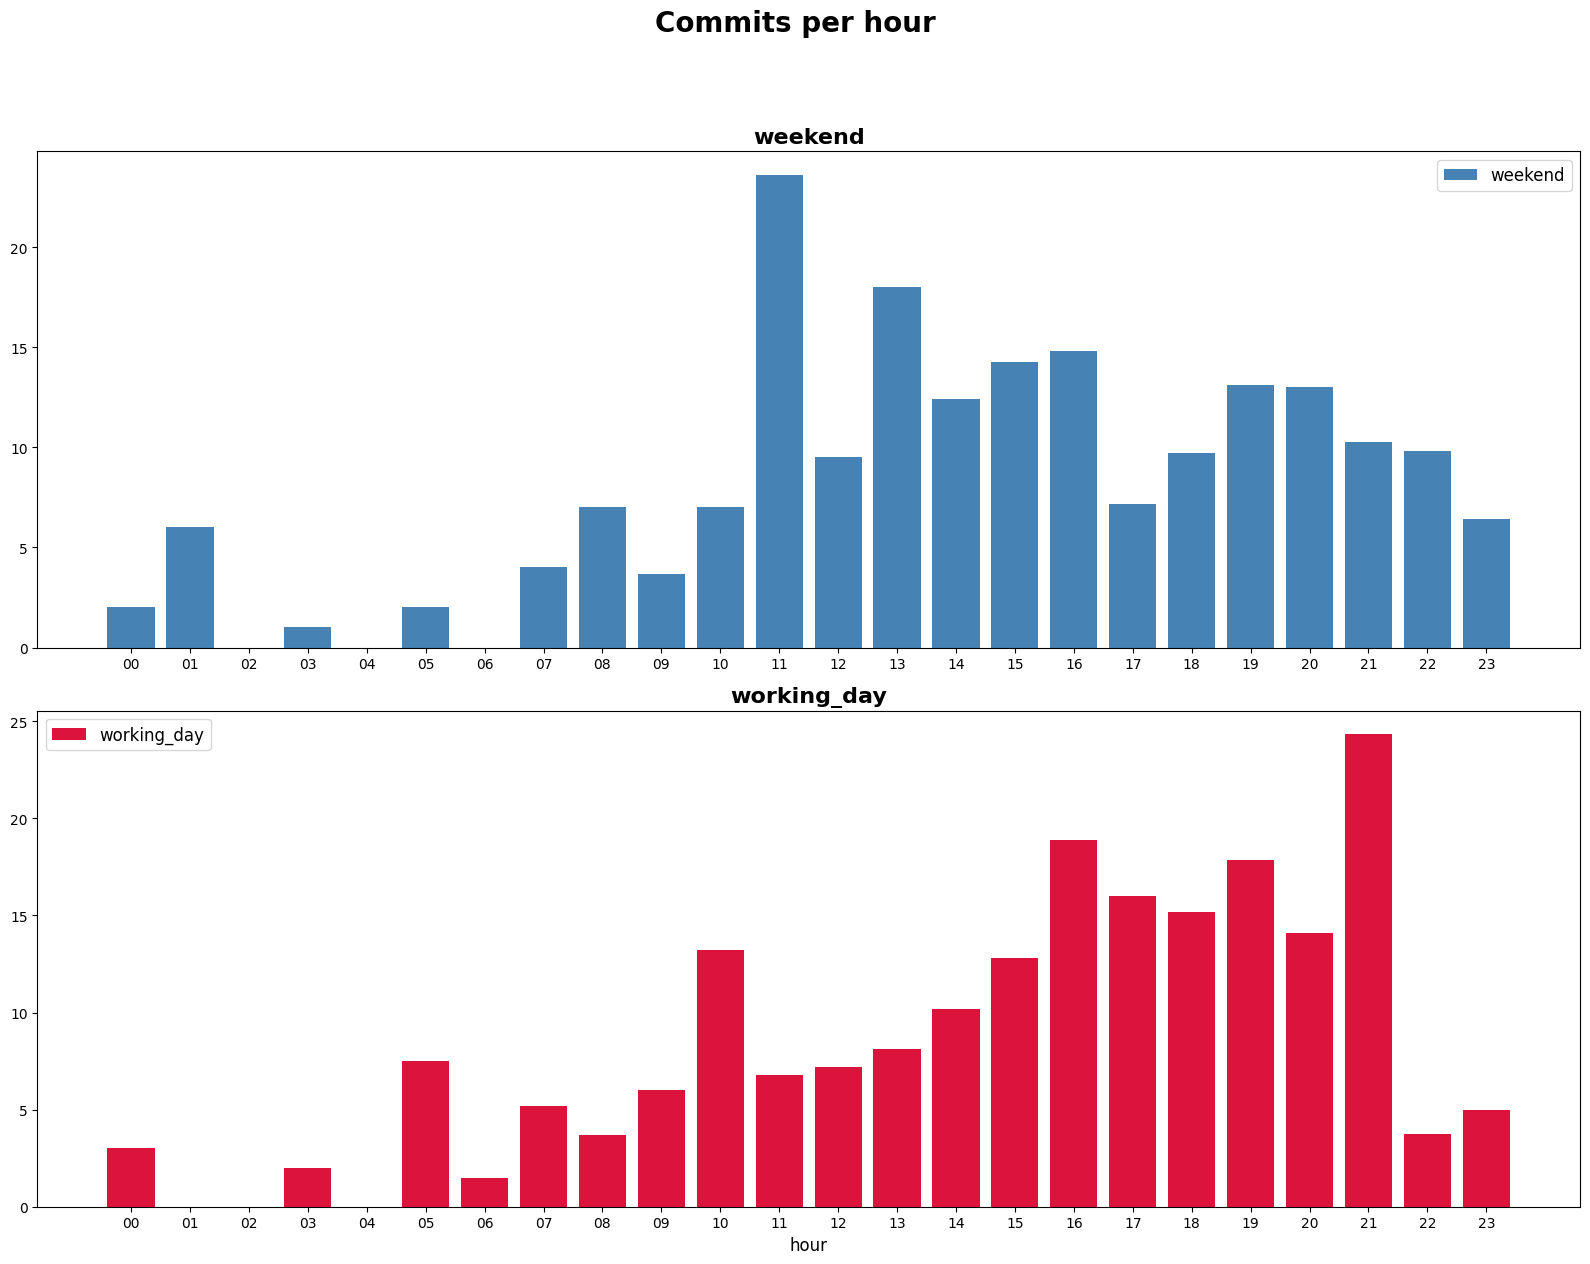

In [30]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))  # 2 ряда, 1 колонка
fig.suptitle('Commits per hour',fontsize=20, fontweight='bold', y=1.05)
colors = ('#4682B4', '#DC143C')

# График будних дней (верхний)
ax1.bar(df_weekends_days['hour'],
        df_weekends_days['count'],
        color=colors[0],
        width=0.8,
        label='weekend'
        )

ax1.set_title('weekend', fontsize=16, fontweight='bold')
ax1.legend(loc='upper right', fontsize=12)

# График выходных дней (нижний)
ax2.bar(df_working_days['hour'],
        df_working_days['count'],
        color=colors[1],
        width=0.8,
        label='working_day'
        )

ax2.set_title('working_day', fontsize=16, fontweight='bold')
ax2.set_xlabel('hour', fontsize=12)
ax2.legend(loc='upper left', fontsize=12)

plt.tight_layout()  # Автоматически настраивает отступы
plt.show()

In [31]:
connection.close()

**Вопрос:** Отличается ли динамика в рабочие и выходные дни? <br>
**Ответ:** Да, максимальное среднее для выходных: 46, для будних: 24.

